In [1]:
#import dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
# import scipy.stats as stats
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import ttest_ind
from scipy import stats
import random

In [2]:
# functions from Nikko
# plots linear regression line and returns pearson correlation
def plot_linregress(x_values, y_values, x_label, y_label, scatter_color):
    plt.scatter(x_values, y_values, color=scatter_color)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    plt.plot(x_values,regress_values,"r-", alpha=0.7)
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq, (min(x_values), min(y_values)),fontsize=18,color="red", alpha=0.7)
    return abs(st.pearsonr(x_values, y_values)[0])

# adds dashed lines to show significane of each GAD threshold
def gad_annotations(x_values):
    # no anxiety
    plt.axhline(4, color='black', alpha = 0.5, linestyle='dashed')
    plt.annotate('No anxiety', (max(x_values)*.85, 3.3), fontsize = 10, color='black', alpha=0.7)
    # mild anxiety
    plt.axhline(9, color='black', alpha = 0.5, linestyle='dashed')
    plt.annotate('Mild anxiety', (max(x_values)*.85, 8.3), fontsize = 10, color='black', alpha=0.7)
    # moderate anxiety
    plt.axhline(14, color='black', alpha = 0.5, linestyle='dashed')
    plt.annotate('Moderate anxiety', (max(x_values)*.85, 13.3), fontsize = 10, color='black', alpha=0.7)
    # severe anxiety
    plt.axhline(21, color='black', alpha = 0.5, linestyle='dashed')
    plt.annotate('Severe anxiety', (max(x_values)*.85, 20.3), fontsize = 10, color='black', alpha=0.7)

# adds dashed lines to show significane of each SWL threshold
def swl_annotations(x_values):
    # extremely dissatisfied
    plt.axhline(9, color='black', alpha = 0.5, linestyle='dashed')
    plt.annotate('Extremely dissatisfied', (max(x_values)*.8, 7.9), fontsize = 10, color='black', alpha=0.7)
    # dissatisfied
    plt.axhline(14, color='black', alpha = 0.5, linestyle='dashed')
    plt.annotate('Dissatisfied', (max(x_values)*.8, 12.9), fontsize = 10, color='black', alpha=0.7)
    # slightly dissatisfied
    plt.axhline(19, color='black', alpha = 0.5, linestyle='dashed')
    plt.annotate('Slightly dissatisfied', (max(x_values)*.8, 17.9), fontsize = 10, color='black', alpha=0.7)
    # neutral
    plt.axhline(20, color='black', alpha = 0.5, linestyle='dashed')
    plt.annotate('Neutral', (max(x_values)*.8, 20.5), fontsize = 10, color='black', alpha=0.7)
    # Slightly satisfied
    plt.axhline(25, color='black', alpha = 0.5, linestyle='dashed')
    plt.annotate('Slightly satisfied', (max(x_values)*.8, 23.9), fontsize = 10, color='black', alpha=0.7)
    # Satisfied
    plt.axhline(30, color='black', alpha = 0.5, linestyle='dashed')
    plt.annotate('Satisfied', (max(x_values)*.8, 28.9), fontsize = 10, color='black', alpha=0.7)
    # Extremely satisfied
    plt.axhline(35, color='black', alpha = 0.5, linestyle='dashed')
    plt.annotate('Extremely satisfied', (max(x_values)*.8, 33.9), fontsize = 10, color='black', alpha=0.7)

# adds dashed lines to show significane of each SPIN threshold
def spin_annotations(x_values):
    # no social anxiety
    plt.axhline(20, color='black', alpha = 0.5, linestyle='dashed')
    plt.annotate('No social anxiety', (max(x_values)*.82, 17.5), fontsize = 10, color='black', alpha=0.7)
    # mild anxiety
    plt.axhline(30, color='black', alpha = 0.5, linestyle='dashed')
    plt.annotate('Mild anxiety', (max(x_values)*.82, 27.5), fontsize = 10, color='black', alpha=0.7)
    # moderate anxiety
    plt.axhline(40, color='black', alpha = 0.5, linestyle='dashed')
    plt.annotate('Moderate anxiety', (max(x_values)*.82, 37.5), fontsize = 10, color='black', alpha=0.7)
    # severe anxiety
    plt.axhline(50, color='black', alpha = 0.5, linestyle='dashed')
    plt.annotate('Severe anxiety', (max(x_values)*.82, 47.5), fontsize = 10, color='black', alpha=0.7)
    # very severe anxiety
    plt.axhline(68, color='black', alpha = 0.5, linestyle='dashed')
    plt.annotate('Very severe anxiety', (max(x_values)*.82, 65.5), fontsize = 10, color='black', alpha=0.7)


# Maribel

In [3]:
#reference file path
data = Path("../data_cleanup/Gaming.csv")

#import data into dataframe
gaming_df = pd.read_csv(data, encoding="UTF-8")

gaming_df.head()


,Unnamed: 0,Entry,Gender,Age,Residence,Birthplace,Work,Degree,Game,Hours per Week,...,SPIN9,SPIN10,SPIN11,SPIN12,SPIN13,SPIN14,SPIN15,SPIN16,SPIN17,SPIN Total
0,0,1,Male,25,USA,USA,Unemployed / between jobs,Bachelor (or equivalent),Skyrim,15,...,0,0,0,0,0,1,0,1,0,5
1,1,2,Male,41,USA,USA,Unemployed / between jobs,Bachelor (or equivalent),Other,8,...,4,0,3,0,1,3,3,1,2,33
2,2,3,Female,32,DEU,DEU,Employed,Bachelor (or equivalent),Other,0,...,0,1,1,3,0,2,4,4,2,31
3,3,4,Male,28,USA,USA,Employed,Bachelor (or equivalent),Other,20,...,0,0,1,3,0,0,1,0,0,11
4,4,5,Male,19,KOR,USA,Employed,High school diploma (or equivalent),Other,20,...,2,0,1,0,0,0,0,3,0,13


In [4]:
#total rows of gaming dataframe
len(gaming_df)

11138

In [5]:
#total genders
gcount=gaming_df["Gender"].value_counts()
gcount

Gender
Male      10463
Female      638
Other        37
Name: count, dtype: int64

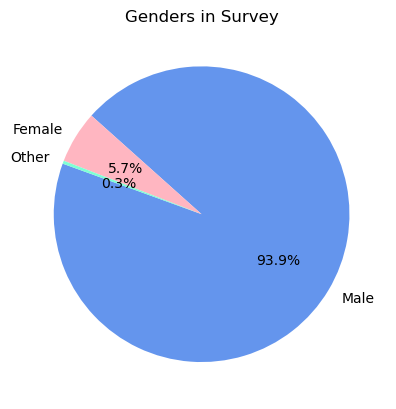

In [6]:
#pie chart of gender
plt.pie(gcount,labels=gcount.index,autopct="%1.1f%%",startangle=160, colors=["cornflowerblue", "lightpink", "aquamarine"])
plt.title("Genders in Survey")
plt.savefig('../images/gender_pie.png')

The pie graph shows that the survey was taken by mostly men.

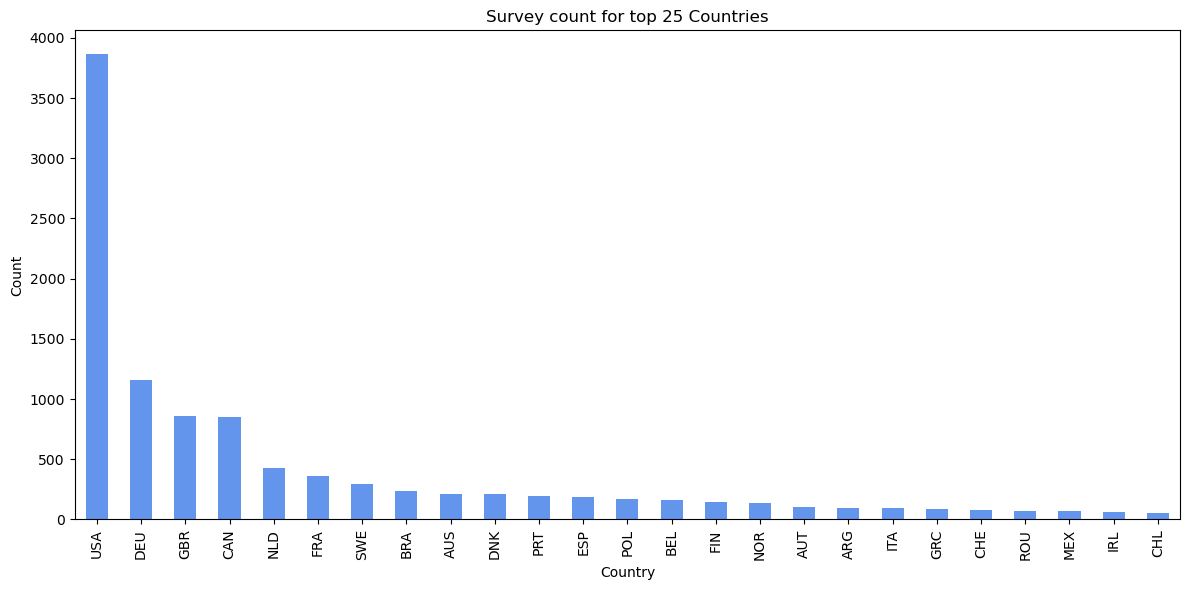

In [7]:
#total countries listed in "Residence" column
rcount=gaming_df["Residence"].value_counts()

#listing the top 25 countries
top25=rcount.head(25).index.tolist()

#filtering dataframe for only the 25 countries
gaming25_df=gaming_df[gaming_df["Residence"].isin(top25)]

#bar graph that shows the count of rows per country
country_counts=gaming25_df["Residence"].value_counts()

plt.figure(figsize=(12,6))
country_counts.plot(kind="bar", color="cornflowerblue")
plt.title("Survey count for top 25 Countries")
plt.xlabel("Country")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig('../images/top25_survey_count_bar.png')

This bar graph shows that a significant amount of data was taken from the USA.

In [8]:
#empty list for test properties of each country: median
gmed=[]
smed=[]
spmed=[]

# loop getting median for eacch studies "total" columns per country
for country in top25:
    #group by country
    country_grp=gaming25_df[gaming25_df['Residence']==country]
    #calculate avg for each total column
    gmed.append(country_grp['GAD Total'].median())
    smed.append(country_grp['SWL Total'].median())
    spmed.append(country_grp['SPIN Total'].median())

# creating a new dataframe from the above info
statsummary=pd.DataFrame({"Residence Country": top25,
                         "Median GAD Total":gmed,
                         "Median SWL Total":smed,
                         "Median SPIN Total":spmed
                        })

# setting the Residence Country as the index
statsummary.set_index("Residence Country", inplace=True)

# plot scatter plots for each median test total 

for column in statsummary.columns:
    sorted_data=statsummary[column].sort_values(ascending=False)
    x=sorted_data.index
    plt.figure()
    plt.bar(x,sorted_data,color="cornflowerblue")
    plt.xticks(rotation=45)
    plt.title(f"Residence Country vs {column}")
    plt.xlabel("Residence Country")
    plt.ylabel(column)
    plt.tight_layout()

    # Save the plot as a PNG file with a unique name based on the column
    plt.savefig(f"../images/residence_country_vs_{column}.png")
    plt.close()

Having plotted and calculated the properties of each total psychological rating scales for the mean, median, variance, standard deviation and SEM, I decided that the median showed a clear representation of the type of the country residence might implicate the rating survey takers were giving.

As an example in the residence country vs median GAD total bar graph, you see countries like Denmark, Finland, Norway, Austria - mostly all countries inland Europe area showing the survey takers felt minimal anxiety associated with game play. For a sharp contrast Romania, Italy and Spain survey takers felt mild anxiety associated with game play.

The same sentiments show in the SWL and SPIN tests.

# Nikko

In [9]:
# import data
gaming_data = pd.read_csv('../data_cleanup/Gaming.csv', encoding='UTF-8')


In [10]:
# trim data
gaming_data = gaming_data[['Entry', 'Gender', 'Age', 'Game', 'Hours per Week', 
            'GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6', 'GAD7', 'GAD Total', 
            'SWL1', 'SWL2', 'SWL3', 'SWL4', 'SWL5', 'SWL Total',
            'SPIN1', 'SPIN2', 'SPIN3', 'SPIN4', 'SPIN5', 'SPIN6', 'SPIN7', 'SPIN8',
            'SPIN9', 'SPIN10', 'SPIN11', 'SPIN12', 'SPIN13', 'SPIN14', 'SPIN15',
            'SPIN16', 'SPIN17', 'SPIN Total']]

gaming_data.head()

,Entry,Gender,Age,Game,Hours per Week,GAD1,GAD2,GAD3,GAD4,GAD5,...,SPIN9,SPIN10,SPIN11,SPIN12,SPIN13,SPIN14,SPIN15,SPIN16,SPIN17,SPIN Total
0,1,Male,25,Skyrim,15,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,5
1,2,Male,41,Other,8,1,2,2,2,0,...,4,0,3,0,1,3,3,1,2,33
2,3,Female,32,Other,0,0,2,2,0,0,...,0,1,1,3,0,2,4,4,2,31
3,4,Male,28,Other,20,0,0,0,0,0,...,0,0,1,3,0,0,1,0,0,11
4,5,Male,19,Other,20,2,1,2,2,2,...,2,0,1,0,0,0,0,3,0,13


In [11]:
# Create age bins
bins = [18, 21, 25, 30, 60]

# Create labels for said bins
group_labels = ["18 to 21", "22 to 25", "26 to 30", "31 to 60"]

# Bin the data
gaming_data["Age Group"] = pd.cut(gaming_data["Age"], bins, labels=group_labels)


In [12]:
# Reorganize DataFrame
gaming_data = gaming_data[['Entry', 'Gender', 'Age Group', 'Age', 'Game', 'Hours per Week', 
            'GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6', 'GAD7', 'GAD Total', 
            'SWL1', 'SWL2', 'SWL3', 'SWL4', 'SWL5', 'SWL Total',
            'SPIN1', 'SPIN2', 'SPIN3', 'SPIN4', 'SPIN5', 'SPIN6', 'SPIN7', 'SPIN8',
            'SPIN9', 'SPIN10', 'SPIN11', 'SPIN12', 'SPIN13', 'SPIN14', 'SPIN15',
            'SPIN16', 'SPIN17', 'SPIN Total']]
gaming_data

,Entry,Gender,Age Group,Age,Game,Hours per Week,GAD1,GAD2,GAD3,GAD4,...,SPIN9,SPIN10,SPIN11,SPIN12,SPIN13,SPIN14,SPIN15,SPIN16,SPIN17,SPIN Total
0,1,Male,22 to 25,25,Skyrim,15,0,0,0,0,...,0,0,0,0,0,1,0,1,0,5
1,2,Male,31 to 60,41,Other,8,1,2,2,2,...,4,0,3,0,1,3,3,1,2,33
2,3,Female,31 to 60,32,Other,0,0,2,2,0,...,0,1,1,3,0,2,4,4,2,31
3,4,Male,26 to 30,28,Other,20,0,0,0,0,...,0,0,1,3,0,0,1,0,0,11
4,5,Male,18 to 21,19,Other,20,2,1,2,2,...,2,0,1,0,0,0,0,3,0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11133,14246,Male,22 to 25,22,Other,40,1,0,0,1,...,0,0,0,0,0,0,1,0,0,7
11134,14247,Female,18 to 21,20,League of Legends,20,3,3,3,3,...,2,1,4,0,2,2,1,0,1,25
11135,14248,Male,18 to 21,19,Starcraft 2,20,0,0,0,0,...,0,1,1,1,0,1,0,0,0,10
11136,14249,Female,NaN,18,Other,5,3,2,1,3,...,4,1,3,1,0,3,2,0,1,32


### Question 1: Do League players suffer more proportionately from GAD/Social Phobia than people playing other games? How about life satisfaction?
- Hypotheses: League players more likely than other players to have:
    - GAD scores between 10-21
    - SWL scores between 5-20
    - SPIN scores between 41-68

In [13]:
# split data into League gamers v. Non-League gamers
league_data = gaming_data[gaming_data['Game'] == 'League of Legends']
not_league_data = gaming_data[gaming_data['Game'] != 'League of Legends']

In [14]:
# check what % of data
league_pct = (len(league_data['SWL Total']) / len(gaming_data['SWL Total'])) * 100
print(f'League players comprise {round(league_pct,2)}% of the data.')

League players comprise 83.73% of the data.


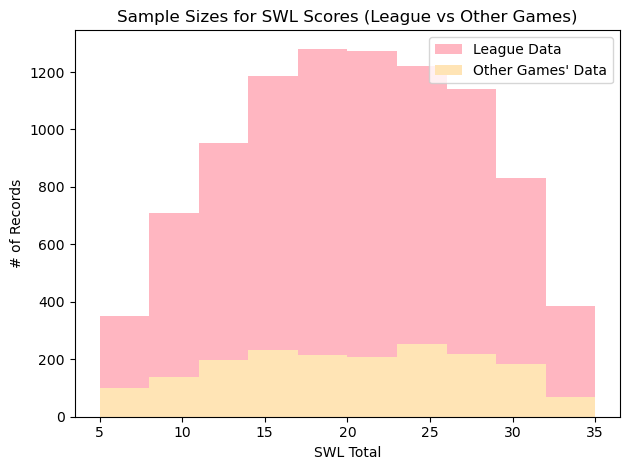

In [15]:
# visual comparison of SWL data between league and non-league gamers
plt.hist(league_data['SWL Total'], label='League Data', color='lightpink')
plt.hist(not_league_data['SWL Total'], label="Other Games' Data", color='moccasin')
plt.xlabel('SWL Total')
plt.ylabel('# of Records')
plt.legend(loc='best')
plt.title('Sample Sizes for SWL Scores (League vs Other Games)')
plt.tight_layout()

plt.savefig('../images/SampleSizes_for_SWL_League_v_Other')

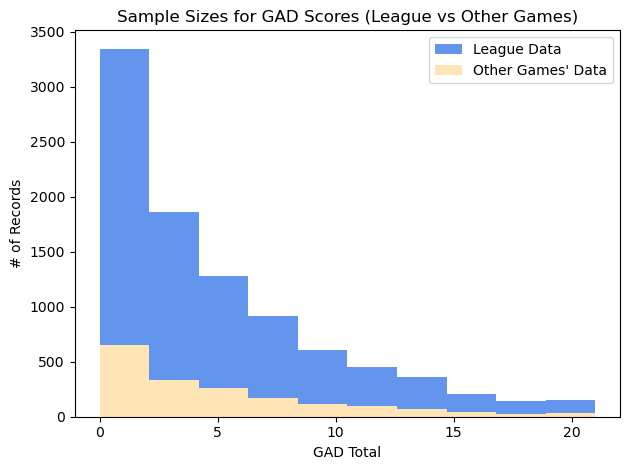

In [16]:
# visual comparison of GAD data between league and non-league gamers
plt.hist(league_data['GAD Total'], label='League Data', color='cornflowerblue')
plt.hist(not_league_data['GAD Total'], label="Other Games' Data", color='moccasin')
plt.xlabel('GAD Total')
plt.ylabel('# of Records')
plt.legend(loc='best')
plt.title('Sample Sizes for GAD Scores (League vs Other Games)')
plt.tight_layout()

plt.savefig('../images/SampleSizes_for_GAD_League_v_Other')

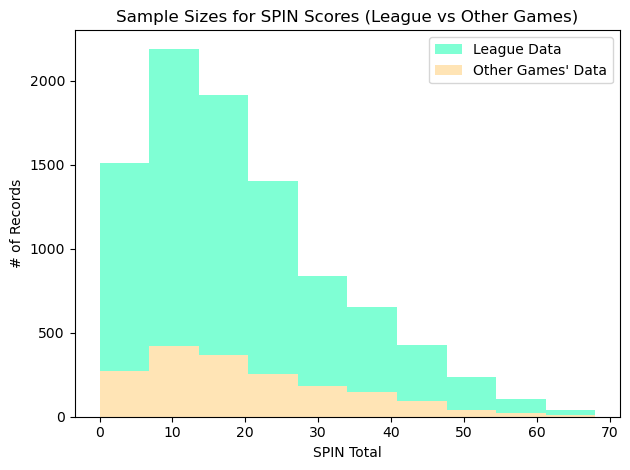

In [17]:
# visual comparison of SPIN data between league and non-league gamers
plt.hist(league_data['SPIN Total'], label='League Data', color='aquamarine')
plt.hist(not_league_data['SPIN Total'], label="Other Games' Data", color='moccasin')
plt.xlabel('SPIN Total')
plt.ylabel('# of Records')
plt.legend(loc='best')
plt.title('Sample Sizes for SPIN Scores (League vs Other Games)')
plt.tight_layout()

plt.savefig('../images/SampleSizes_for_SPIN_League_v_Other')

In [18]:
# calculate T-Test of league player scores v not_league player scores
swl_lol_ttest = st.ttest_ind(league_data['SWL Total'], not_league_data['SWL Total'])
gad_lol_ttest = st.ttest_ind(league_data['GAD Total'], not_league_data['GAD Total'])
spin_lol_ttest = st.ttest_ind(league_data['SPIN Total'], not_league_data['SPIN Total'])
print('The statistical significance values (p-values) between League and Non-League Players are:')
print(f'\tSWL p-value: {round(swl_lol_ttest.pvalue, 2)}')
print(f'\tGAD p-value: {round(gad_lol_ttest.pvalue, 2)}')
print(f'\tSPIN p-value: {round(spin_lol_ttest.pvalue, 2)}')
print('Because the p-values for each of the tests are greater than 0.05, \nwe cannot reject the null hypothesis that there is no difference between these two populations.')

The statistical significance values (p-values) between League and Non-League Players are:
	SWL p-value: 0.28
	GAD p-value: 0.48
	SPIN p-value: 0.09
Because the p-values for each of the tests are greater than 0.05, 
we cannot reject the null hypothesis that there is no difference between these two populations.


## Question 2: Is there any correlation between ages of gamers and their psychological scores? Do older players tend to have lower Generalized Anxiety or Social Phobia? Are older players more satisfied with life?

In [19]:
# create x_age sample for plotting the various tests
sample_size = 100
sample_age = gaming_data.sample(sample_size)
x_age = sample_age['Age'].sample(sample_size)

Pearson correlation coefficient is 0.06


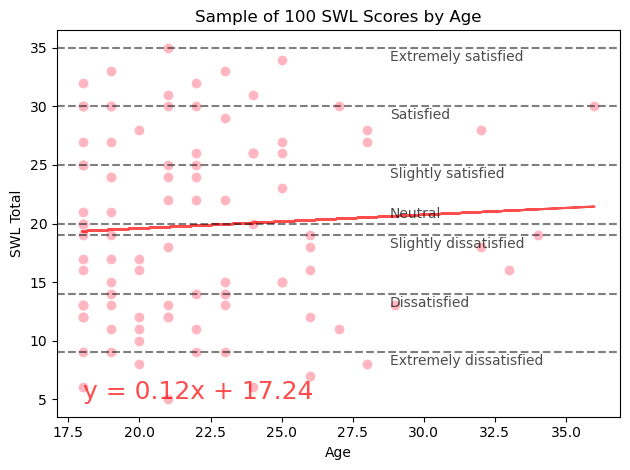

In [20]:
# plot sample of 
# SWL Totals v Age
swl_y_age = sample_age['SWL Total']
pears = plot_linregress(x_age, swl_y_age, 'Age', 'SWL Total', 'lightpink')
swl_annotations(x_age)
plt.title(f'Sample of {sample_size} SWL Scores by Age')
plt.tight_layout()
print(f'Pearson correlation coefficient is {abs(round(pears,2))}')

plt.savefig('../images/Sample_SWL_by_Age')

Pearson correlation coefficient is 0.17


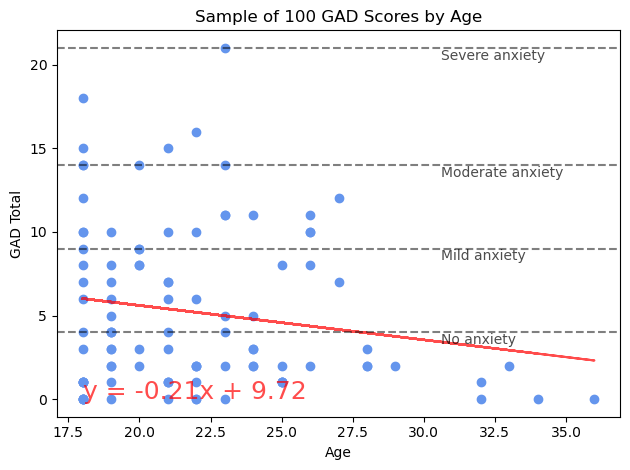

In [21]:
# GAD Totals v Age
gad_y_age = sample_age['GAD Total']
pears = plot_linregress(x_age, gad_y_age, 'Age', 'GAD Total', 'cornflowerblue')
gad_annotations(x_age)
plt.title(f'Sample of {sample_size} GAD Scores by Age')
plt.tight_layout()
print(f'Pearson correlation coefficient is {abs(round(pears,2))}')

plt.savefig('../images/Sample_GAD_by_Age')

Pearson correlation coefficient is 0.04


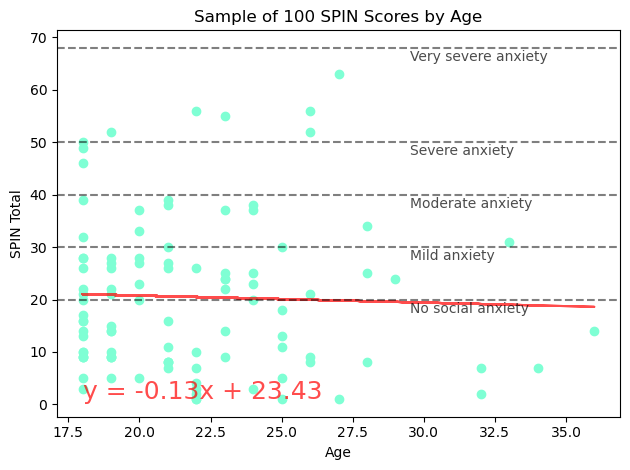

In [22]:
# SPIN Totals v Age
spin_y_age = sample_age['SPIN Total']
pears = plot_linregress(x_age, spin_y_age, 'Age', 'SPIN Total', 'aquamarine')
spin_annotations(x_age)
plt.title(f'Sample of {sample_size} SPIN Scores by Age')
plt.tight_layout()
print(f'Pearson correlation coefficient is {abs(round(pears,2))}')

plt.savefig('../images/Sample_SPIN_by_Age')

Based on the pearson correlation coefficients above for SWL, GAD, and SPIN scores, there is no correlation between age and the aforementioned psychological tests.

In [23]:
# create aggregate table of ages v test scores
age_summary = gaming_data.groupby('Age')[['SWL Total', 'GAD Total', 'SPIN Total']]
agg_age = age_summary.agg(['mean', 'median', 'var', 'std', 'sem'])

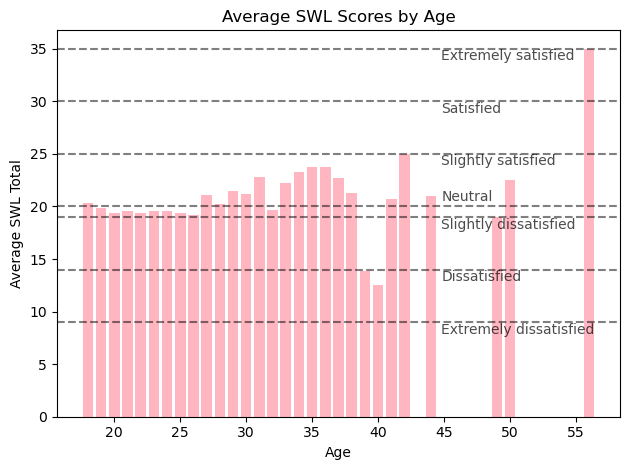

In [24]:
# plot SWL scores by age
x_values = agg_age.index
y_values = agg_age['SWL Total']['mean']
plt.bar(x_values, y_values, color='lightpink')
swl_annotations(x_values)
plt.xlabel('Age')
plt.ylabel('Average SWL Total')
plt.title('Average SWL Scores by Age')
plt.tight_layout()

plt.savefig('../images/Average_SWL_by_Age')

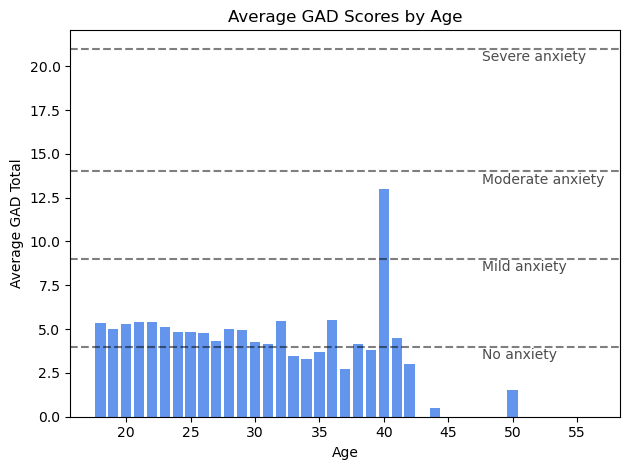

In [25]:
# plot GAD scores by age
x_values = agg_age.index
y_values = agg_age['GAD Total']['mean']
plt.bar(agg_age.index, agg_age['GAD Total']['mean'], color='cornflowerblue')
gad_annotations(x_values)
plt.xlabel('Age')
plt.ylabel('Average GAD Total')
plt.title('Average GAD Scores by Age')
plt.tight_layout()

plt.savefig('../images/Average_GAD_by_Age')

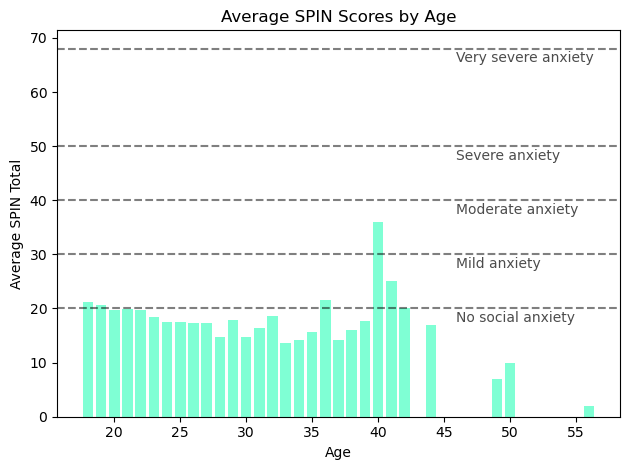

In [26]:
# plot SPIN scores by age
x_values = agg_age.index
y_values = agg_age['SPIN Total']['mean']
plt.bar(agg_age.index, agg_age['SPIN Total']['mean'], color='aquamarine')
spin_annotations(x_values)
plt.xlabel('Age')
plt.ylabel('Average SPIN Total')
plt.title('Average SPIN Scores by Age')
plt.tight_layout()

plt.savefig('../images/Average_SPIN_by_Age')

In addition the pearson correlation coefficient analysis, plotting the average test scores for SWL, GAD, and SPIN, it is clear that there is no correlation between age and these psychological tests.

### Auxiliary Graphs/Exploration

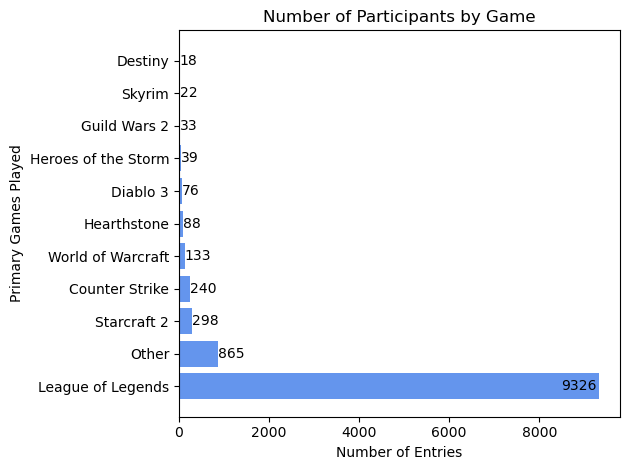

In [27]:
# show game data skew
games_only = gaming_data['Game'].value_counts()
# plot games data to visualize. chose 
fig1, ax1 = plt.subplots()
bars = ax1.barh(games_only.index, games_only, color='cornflowerblue')
# make complementary lists for plotting. League will overlap along the edge of the graph if not.
other_games = [game if game != games_only.iloc[0] else '' for game in games_only]
league_bar = [game if game == games_only.iloc[0] else ''for game in games_only]
# plot said complementary lists
ax1.bar_label(bars, other_games)
ax1.bar_label(bars, league_bar, padding = -27)
plt.xlabel('Number of Entries')
plt.ylabel('Primary Games Played')
plt.title('Number of Participants by Game')
plt.tight_layout()

plt.savefig('../images/Total_Participants_By_Game')

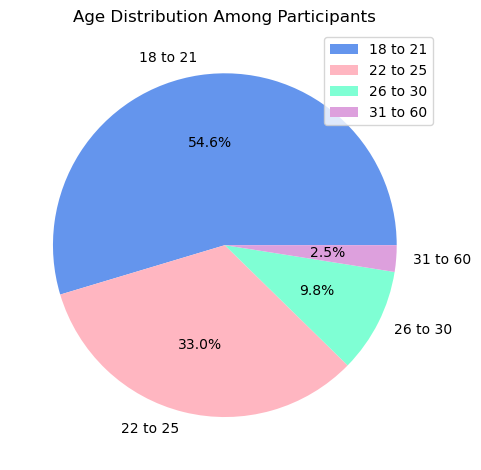

In [28]:
# show age data skew
age_only = gaming_data['Age Group'].value_counts()
# pie chart
plt.pie(age_only, labels=age_only.index, autopct='%.1f%%', colors=['cornflowerblue','lightpink','aquamarine','plum'])
plt.legend(loc='best')
plt.title('Age Distribution Among Participants')
plt.tight_layout()

plt.savefig('../images/Age_Distribution_Among_Participants')

# Ashley

### **Is there a relationship between anxiety and the motivation for gaming?** - Ashley

#### Hypothesis:
- If there is a relationship between anxiety and the motivation for gaming, then playing to have fun should result in a significantly different GAD-7 score compared to playing to win. 

In [29]:
#reference file path
data = Path("../data_cleanup/Gaming.csv")

#import data into dataframe
oggame_df = pd.read_csv(data, encoding="UTF-8")

oggame_df.head()

,Unnamed: 0,Entry,Gender,Age,Residence,Birthplace,Work,Degree,Game,Hours per Week,...,SPIN9,SPIN10,SPIN11,SPIN12,SPIN13,SPIN14,SPIN15,SPIN16,SPIN17,SPIN Total
0,0,1,Male,25,USA,USA,Unemployed / between jobs,Bachelor (or equivalent),Skyrim,15,...,0,0,0,0,0,1,0,1,0,5
1,1,2,Male,41,USA,USA,Unemployed / between jobs,Bachelor (or equivalent),Other,8,...,4,0,3,0,1,3,3,1,2,33
2,2,3,Female,32,DEU,DEU,Employed,Bachelor (or equivalent),Other,0,...,0,1,1,3,0,2,4,4,2,31
3,3,4,Male,28,USA,USA,Employed,Bachelor (or equivalent),Other,20,...,0,0,1,3,0,0,1,0,0,11
4,4,5,Male,19,KOR,USA,Employed,High school diploma (or equivalent),Other,20,...,2,0,1,0,0,0,0,3,0,13


### **Cleaning Gaming.csv to only include Gaming Motivation and GAD scores**

In [30]:
#check columns for dropping
oggame_df.columns

Index(['Unnamed: 0', 'Entry', 'Gender', 'Age', 'Residence', 'Birthplace',
       'Work', 'Degree', 'Game', 'Hours per Week', 'Gaming Motivation',
       'Playstyle', 'GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6', 'GAD7',
       'GAD Total', 'SWL1', 'SWL2', 'SWL3', 'SWL4', 'SWL5', 'SWL Total',
       'SPIN1', 'SPIN2', 'SPIN3', 'SPIN4', 'SPIN5', 'SPIN6', 'SPIN7', 'SPIN8',
       'SPIN9', 'SPIN10', 'SPIN11', 'SPIN12', 'SPIN13', 'SPIN14', 'SPIN15',
       'SPIN16', 'SPIN17', 'SPIN Total'],
      dtype='object')

In [31]:
#drop unused columns
dropoggame_df = oggame_df.drop(columns= ['Unnamed: 0', 'Gender', 'Age', 'Residence', 'Birthplace',
       'Work', 'Degree', 'Game', 'Hours per Week', 'Playstyle', 'SWL1', 'SWL2', 'SWL3', 'SWL4', 'SWL5', 'SWL Total',
       'SPIN1', 'SPIN2', 'SPIN3', 'SPIN4', 'SPIN5', 'SPIN6', 'SPIN7', 'SPIN8',
       'SPIN9', 'SPIN10', 'SPIN11', 'SPIN12', 'SPIN13', 'SPIN14', 'SPIN15',
       'SPIN16', 'SPIN17', 'SPIN Total'])

dropoggame_df

,Entry,Gaming Motivation,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GAD Total
0,1,having fun,0,0,0,0,1,0,0,1
1,2,having fun,1,2,2,2,0,1,0,8
2,3,having fun,0,2,2,0,0,3,1,8
3,4,improving,0,0,0,0,0,0,0,0
4,5,having fun,2,1,2,2,2,3,2,14
...,...,...,...,...,...,...,...,...,...,...
11133,14246,improving,1,0,0,1,0,1,1,4
11134,14247,winning,3,3,3,3,2,3,3,20
11135,14248,having fun,0,0,0,0,0,0,0,0
11136,14249,having fun,3,2,1,3,0,1,3,13


In [32]:
#looking at all dataframe responses
all_gm_responses = dropoggame_df['Gaming Motivation'].unique()
all_gm_responses

array(['having fun', 'improving', 'relaxing', 'winning',
       'improving, having fun', 'All',
       "I play it as I watch TV or movies.  I've gone through many a Netflix binge with Isaac.",
       'all of the above', 'passing the time', 'having fun and improving',
       'Forgetting troubles', 'All of them', 'Being with friends',
       'getting good loot', 'have fun and win', 'Wasting time',
       'talking to irl friends', 'improving while having fun',
       'All of the above!', 'socializing', 'all above', 'playing well',
       'the three last: improving, relaxing and having fun',
       'winning and improving',
       'depends, wwinning in rankeds, fun and relaxing in normal / aram',
       'winning whilst improving', 'Relaxing & having fun',
       'improving & having fun', 'All of the above.', 'All of the above',
       'winning because if i lose while boosting i wont get money ',
       'passing time', 'not thinking about my clinic depression.',
       'all answers mentioned

In [33]:
#making all responses lowercase for uniformity and easier filtering
dropoggame_df['Gaming Motivation'] = dropoggame_df['Gaming Motivation'].str.lower()

#looking at all gaming motivation responses for cleanup + their counts
all_gm_response_counts = dropoggame_df['Gaming Motivation'].value_counts()
all_gm_response_counts

Gaming Motivation
having fun                                                                          4479
improving                                                                           4019
winning                                                                             1699
relaxing                                                                             566
all of the above                                                                      36
                                                                                    ... 
competitive play, improving but in games that are winnable                             1
winning and having fun, i'm a sporty person so i'm competitive.                        1
winning improving relaxing having fun                                                  1
getting to the top of the boards                                                       1
mental priority is fun>improve>win, actual priority once in game win>improve>fun       1
Nam

In [34]:
#filtering dataframe 'Gaming Motivation' based on whether the string includes one of the words in keep_words
keep_words = ['win', 'improv', 'fun', 'relax', 'all', 'comb', 'mix']
filter_df = dropoggame_df[dropoggame_df['Gaming Motivation'].str.contains('|'.join(keep_words))]

#checking filtered dataframe's unique responses
filter_gm_response = filter_df['Gaming Motivation'].unique()
filter_gm_response

array(['having fun', 'improving', 'relaxing', 'winning',
       'improving, having fun', 'all', 'all of the above',
       'having fun and improving', 'all of them', 'have fun and win',
       'improving while having fun', 'all of the above!', 'all above',
       'the three last: improving, relaxing and having fun',
       'winning and improving',
       'depends, wwinning in rankeds, fun and relaxing in normal / aram',
       'winning whilst improving', 'relaxing & having fun',
       'improving & having fun', 'all of the above.',
       'winning because if i lose while boosting i wont get money ',
       'all answers mentioned', 'all of the above ',
       'winning is the most fun but i sometimes still have fun if i loose',
       'conpeting, the fun that comes with it', 'all of these 4',
       'relaxing+having fun', 'improving and having fun',
       "winning and improving, it's stoped being about fun a long time ago, but fun is still there",
       'equally value winning and havin

In [35]:
#creating main gaming motivation dataframe with only four responses (winning, improving, having fun, relaxing)
#making df copy and listing words to keep for filtering
simple_copy = filter_df.copy()
filtering_words = ['win','improv','fun','relax']

#filtering df to include rows with only one of the specific words and not any others
simple_filter_df = simple_copy[simple_copy['Gaming Motivation'].apply(
    lambda x: sum(1 for word in filtering_words if f'{word}' in f'{x}') == 1)]

#checking simple_filter responses and getting value counts
simple_filter_responses = simple_filter_df['Gaming Motivation'].value_counts()
simple_filter_responses

Gaming Motivation
having fun                                                                                                                                                                                          4479
improving                                                                                                                                                                                           4019
winning                                                                                                                                                                                             1699
relaxing                                                                                                                                                                                             566
having fun together with friends                                                                                                                                                  

In [36]:
#replacing longer responses with simpler responses
replace_dict = {
        "not losing my time and improve": "improving",
        "having fun together with friends": "having fun",
        "having fun by spending time with my friends :d": "having fun",
        "if it's not fun, i won't do it, however i want to get good at league because it can be challenging to get good at, it's something to work on in life and it's extremely fun so why the fuck not!": "having fun",
        "having fun by giving it your best shot.": "having fun",
        "having fun with friends": "having fun",
        "conpeting, the fun that comes with it": "having fun",
        "winning with friends, winning while alone is almost depressing.": "winning",
        "playing with friends and winning with them as a team": "winning",
        "winning and having interesting plays": "winning",
        "individual performance and winning together": "winning",
        "it just works as a distraction. other then that winning and climbing that ladder": "winning",
        "winning because if i lose while boosting i wont get money": "winning"
    
}
simple_copy_df = simple_filter_df.copy()
simple_copy_df.replace(replace_dict, inplace=True, regex=True)

#checking simple_filter responses and getting value counts
simple_filter_responses = simple_copy_df['Gaming Motivation'].value_counts()
simple_filter_responses

Gaming Motivation
having fun                                                 4485
improving                                                  4020
winning                                                    1704
relaxing                                                    566
winning                                                       1
all of the above minus relaxing                               1
all of those, but i guess everyone wants to win...            1
i have fun when i see myself getting better at the game       1
all of the above with an emphasis on winning.                 1
improvement and enjoyment                                     1
getting better so i can win more                              1
Name: count, dtype: int64

In [37]:
#drop mixed responses from simple_copy_df
#list of responses to keep
keep_resp = ["having fun", "improving", "winning", "relaxing"]

#copy of df 
simcopy_df = simple_copy_df.copy()

#keeping only keep_resp in dataframe
simpler_copy_df = simcopy_df[simcopy_df['Gaming Motivation'].isin(keep_resp)]

#checking counts for each response
simpler_copy_df['Gaming Motivation'].value_counts()

Gaming Motivation
having fun    4485
improving     4020
winning       1704
relaxing       566
Name: count, dtype: int64

In [38]:
#creating df with 'all' responses
#creating all and mixed gaming motivation dataframe 
mix_copy = filter_df.copy()
mix_ans = ['win','improv','fun', 'relax', 'all', 'mix', 'comb']

#filter rows with two or more words from mix_ans
mix_filter_df = mix_copy[mix_copy['Gaming Motivation'].apply(lambda x: ('all ' in x) or (sum(word in x for word in mix_ans) >= 2))]

#checking mix_filter responses
mix_filter_responses = mix_filter_df['Gaming Motivation'].unique()
mix_filter_responses

array(['improving, having fun', 'all of the above',
       'having fun and improving', 'all of them', 'have fun and win',
       'improving while having fun', 'all of the above!', 'all above',
       'the three last: improving, relaxing and having fun',
       'winning and improving',
       'depends, wwinning in rankeds, fun and relaxing in normal / aram',
       'winning whilst improving', 'relaxing & having fun',
       'improving & having fun', 'all of the above.',
       'all answers mentioned', 'all of the above ',
       'winning is the most fun but i sometimes still have fun if i loose',
       'all of these 4', 'relaxing+having fun',
       'improving and having fun',
       "winning and improving, it's stoped being about fun a long time ago, but fun is still there",
       'equally value winning and having fun',
       'all of the above minus relaxing',
       'combination of all above, mostly improving and winning',
       'both, improving and having fun', 'having fun while 

In [39]:
#replacing all mixed filter responses with "mixed response"
mix_copy_df = mix_filter_df.copy()
mix_copy_df['Gaming Motivation'] = 'mixed response'

#concat mix_copy_df and simple_copy_df together
concat_GADgm = pd.concat([simpler_copy_df, mix_copy_df])
#checking counts for each response
concat_GADgm['Gaming Motivation'].value_counts()

Gaming Motivation
having fun        4485
improving         4020
winning           1704
relaxing           566
mixed response     244
Name: count, dtype: int64

In [40]:
#sorting GADgm by Entry number
sorted_GADgm = concat_GADgm.sort_values(by= 'Entry')

#capitalizing/renaming responses in Gaming Motivation
rename ={
    'having fun': 'Having Fun',
    'relaxing': 'Relaxing',
    'improving': 'Improving',
    'winning': 'Winning',
    'mixed response': 'Mixed Response'

}
GADgm_df = sorted_GADgm.copy()
GADgm_df.replace(rename, inplace=True, regex=True)

#checking GADgm responses
GADgm_responses = GADgm_df['Gaming Motivation'].value_counts()
GADgm_responses

Gaming Motivation
Having Fun        4485
Improving         4020
Winning           1704
Relaxing           566
Mixed Response     244
Name: count, dtype: int64

### **Pie chart of gaming motivation categories**

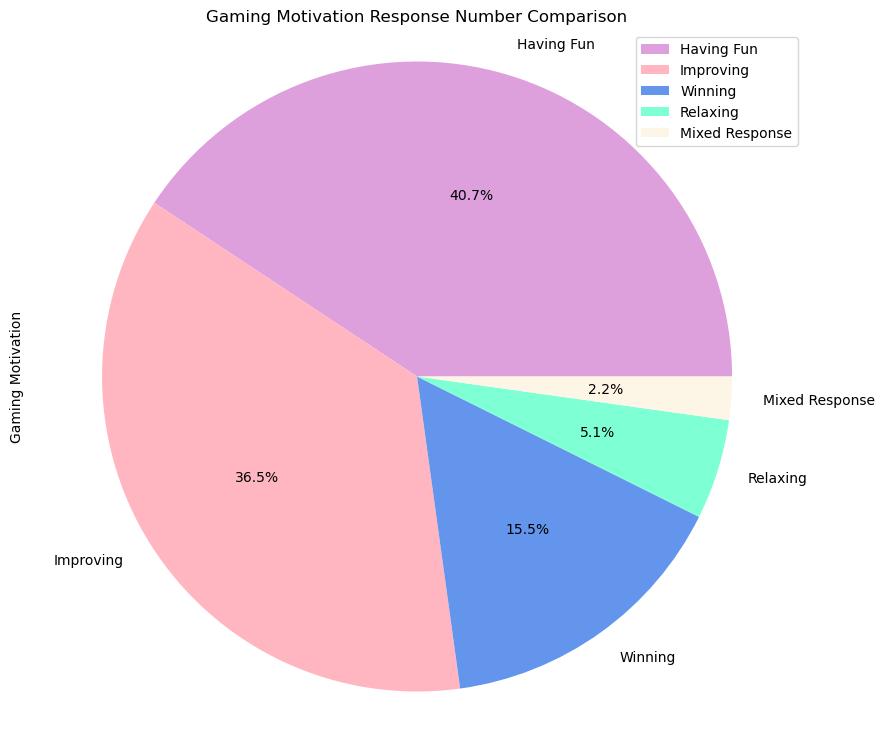

In [41]:
#creating pie chart or bar graph of all responses used for question
resp_pie = GADgm_df["Gaming Motivation"].value_counts()
resp_pie_df = pd.DataFrame(resp_pie)
plt.figure(figsize=(10,9))
plt.pie(resp_pie, 
    labels = resp_pie_df.index,
    autopct = "%1.1f%%", 
    colors = ["plum", "lightpink", "cornflowerblue", "aquamarine", "oldlace"])
plt.ylabel("Gaming Motivation")
plt.axis("equal")
plt.title("Gaming Motivation Response Number Comparison")
plt.legend(labels=resp_pie_df.index, loc="best", fontsize = "medium")
plt.tight_layout;

fold_path = "../images/"
plt.savefig(fold_path + 'GameMotive_Pie')

#### Pie-chart explanation: 
- This chart shows an overview of the population's responses to what their motivation is when gaming. The majority of the responses recorded consisted of "Having Fun" and "Improving"  

### **Boxplot displaying gaming motivation categories based on anxiety**

The gaming motive 'Having Fun' has 105 potential outlier(s) out of 4485 responses.
The gaming motive 'Relaxing' has 10 potential outlier(s) out of 566 responses.
The gaming motive 'Improving' has 208 potential outlier(s) out of 4020 responses.
The gaming motive 'Winning' has 31 potential outlier(s) out of 1704 responses.
The gaming motive 'Mixed Response' has 7 potential outlier(s) out of 244 responses.


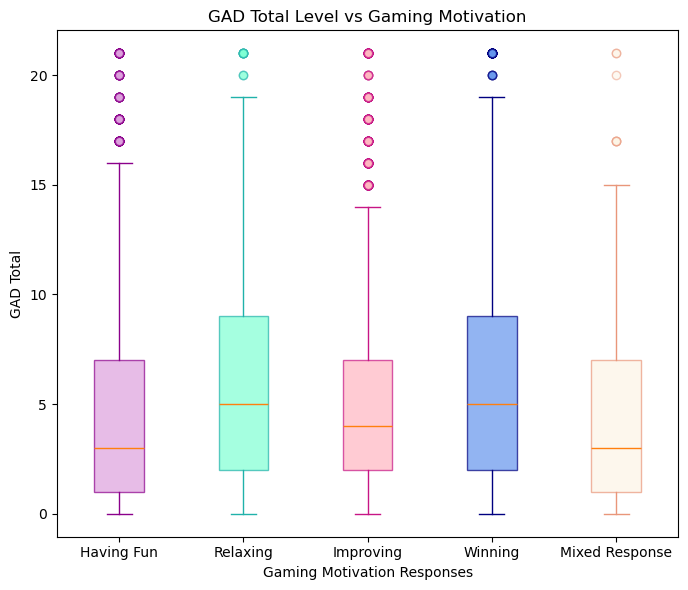

In [42]:
#creating boxplot for anxiety and gaming motivation
#list for for loop (and later for plot labels)
gaming_motive = ["Having Fun", "Relaxing", "Improving", "Winning", "Mixed Response"]
#creating new dataframe for data plotting with lists
entry_list = GADgm_df['Entry'].tolist()
gm_list = GADgm_df['Gaming Motivation'].tolist()
GADtotal_list = GADgm_df['GAD Total'].tolist()

plot_data_df = {
     'Entry' : entry_list,
     'Gaming Motivation' : gm_list,
     'GAD Total' : GADtotal_list
}

plot_data_df = pd.DataFrame(plot_data_df)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for motive in gaming_motive:
    quartiles = plot_data_df.loc[plot_data_df['Gaming Motivation'] == motive, 'GAD Total'].quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    box_data = plot_data_df.loc[plot_data_df['Gaming Motivation'] == motive, 'GAD Total']
    outliers = box_data[(box_data < lower_bound) | (box_data > upper_bound)]

    #printing number of outliers and total responses for each gaming motivation
    print(f"The gaming motive '{motive}' has {outliers.count()} potential outlier(s) out of {len(box_data)} responses.")

#creating box plot for GAD Total vs Gaming Motivation
#setting figure size
fig, ax = plt.subplots(figsize=(7,6))

#setting box plot positions 
positions = range(1, len(gaming_motive) +1)

#setting colors and edgecolors for each gaming motive
box_colors = ["plum", "aquamarine", "lightpink", "cornflowerblue", "oldlace"]
box_edgec = ["darkmagenta", "lightseagreen", "mediumvioletred", "navy", "darksalmon"]

#plotting box plots for each gaming motive based on GAD Total
for i, motive in enumerate(gaming_motive):
    motive_data = plot_data_df[plot_data_df['Gaming Motivation'] == motive]['GAD Total']
    
    #formatting boxplots
    boxplot = ax.boxplot(motive_data,
                         positions=[positions[i]],
                         widths=0.4,
                         patch_artist=True,
                         boxprops=dict(facecolor= box_colors[i], edgecolor= box_edgec[i], alpha= 0.7),
                         whiskerprops=dict(color= box_edgec[i], alpha= 1),
                         flierprops=dict(marker= 'o', markerfacecolor= box_colors[i], markeredgecolor= box_edgec[i], markersize= 6, alpha= 0.5),
                         capprops=dict(color= box_edgec[i], alpha= 1))

#extra formatting for boxplots
ax.set_xticks(positions)
ax.set_xticklabels(gaming_motive)
ax.set_title('GAD Total Level vs Gaming Motivation')
ax.set_ylabel('GAD Total')
ax.set_xlabel('Gaming Motivation Responses')


plt.tight_layout()
fold_path = "../images/"
plt.savefig(fold_path + 'GameMotive_BoxPlot')


#### Box-plot explanation: 
- The gaming motive 'Having Fun' has 105 potential outliers out of 4485 responses. 'Relaxing' has 10/566 potential outliers. 'Improving' has 208/4020,'Winning' has 31/1704, and 'Mixed Response' has 7/244. Looking at the output of GAD scores for each gaming motive, each gaming motive's full response length, and taking into consideration the cleaned dataset (I removed rows that I figured ingenuine due to their content and consisted of answers that did not align with the goal of this analysis) and the highest score possible for the GAD-7, I deemed the majority of these outliers to be genuine. However, it should be taken into account that based on our population (2015 online gamers/reddit users likely not within a strict survey environment) it is likely some responses may be disingenuine.

### **Independent t-test of gaming motivation categories**

Using an alpha level of 0.5, those that listed their gaming motivation as "Having Fun" had significantly lower GAD totals than those listing theirs as "Winning", t(6187) = -4.614, p = 0.0.


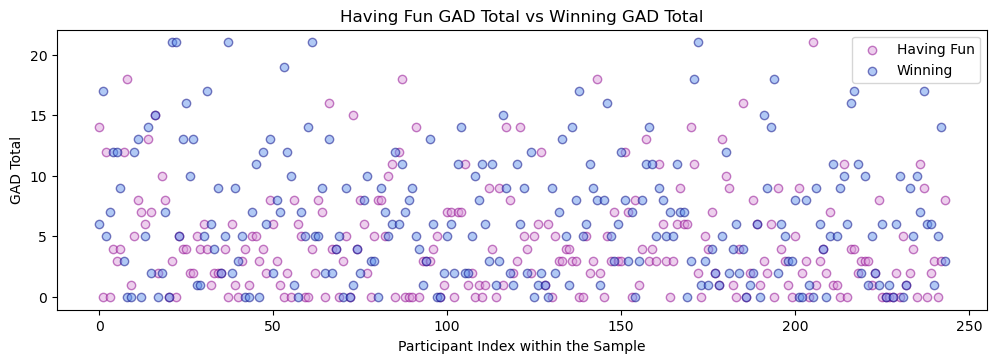

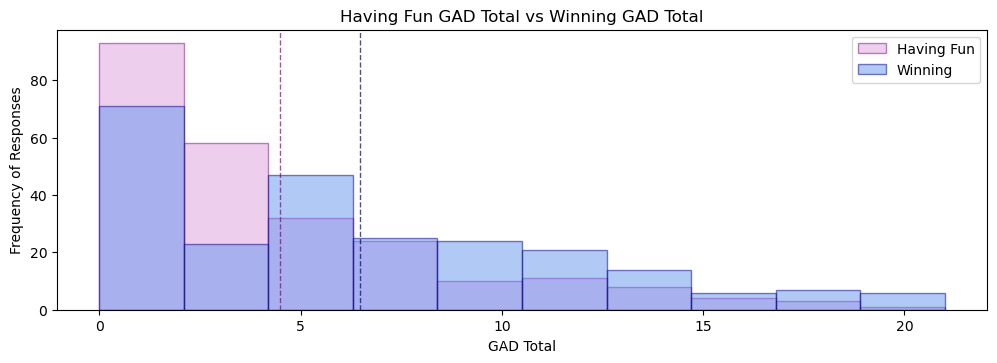

In [43]:
#creating independent t tests between different gaming motives and their GAD Totals
#creating separate populations for each gaming motive
fun_pop = []
improve_pop = []
relax_pop = []
win_pop = []
mix_pop = []

#different colors + edgecolors for different categories
fun_color = "plum"
fun_edgec = "darkmagenta"
improve_color = "lightpink"
improve_edgec = "mediumvioletred"
relax_color = "aquamarine"
relax_edgec = "lightseagreen"
win_color = "cornflowerblue"
win_edgec = "navy"
mix_color = "oldlace"
mix_egec = "darksalmon"

mix_color = "oldlace"

for index, row in plot_data_df.iterrows():
    if row['Gaming Motivation'] == 'Having Fun':
        fun_pop.append(row['GAD Total'])
    elif row['Gaming Motivation'] == 'Improving':
        improve_pop.append(row['GAD Total'])
    elif row['Gaming Motivation'] == 'Relaxing':
        relax_pop.append(row['GAD Total'])
    elif row['Gaming Motivation'] == 'Winning':
        win_pop.append(row['GAD Total'])
    elif row['Gaming Motivation'] == 'Mixed Response':
        mix_pop.append(row['GAD Total'])


#creating definition for creating independent-T test taking two different populations, their labels, and a figure title
def ttestdata(pop1, pop2, label1, label2, color1, color2, edgec1, edgec2, figtitle):
    #getting random sample from the previous populations
    sample_size = 244
    sample_pop1 = random.sample(pop1, sample_size)
    sample_pop2 = random.sample(pop2, sample_size)

    #making scatter plot of data
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 1, 1)
    plt.scatter(range(len(sample_pop1)), sample_pop1, label= label1, marker="o", color= color1, edgecolor= edgec1, alpha = 0.5)
    plt.scatter(range(len(sample_pop2)), sample_pop2, label= label2, marker="o", color= color2, edgecolor= edgec2, alpha = 0.5)
    plt.xlabel("Participant Index within the Sample")
    plt.ylabel("GAD Total")
    plt.legend(loc = 'best')
    plt.title(f"{label1} GAD Total vs {label2} GAD Total")
    fold_path = "../images/"
    plt.savefig(fold_path + f'{figtitle}_Scatter')

    #making histogram of data
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 1, 2)
    plt.hist(sample_pop1, 10, density=False, alpha=0.5, label= label1, color = color1, edgecolor= edgec1)
    plt.hist(sample_pop2, 10, density=False, alpha=0.5, label= label2, color = color2, edgecolor= edgec2)
    plt.axvline(np.mean(sample_pop1), color=edgec1, linestyle='dashed', linewidth=1, alpha = 0.7)
    plt.axvline(np.mean(sample_pop2), color=edgec2, linestyle='dashed', linewidth=1, alpha = 0.7)
    plt.xlabel("GAD Total")
    plt.ylabel("Frequency of Responses")
    plt.legend(loc= 'best')
    plt.title(f"{label1} GAD Total vs {label2} GAD Total")
    plt.tight_layout
    fold_path = "../images/"
    plt.savefig(fold_path + f'{figtitle}_Histogram')

    #t-statistic, and p-value
    t_statistic, p_value = stats.ttest_ind(sample_pop1, sample_pop2, equal_var=False)

    #calculating degrees of freedom
    deg_freedom = len(pop1) + len(pop2) -2
    
    #structuring sentence output

    #determining words higher or lower based on t-statistic
    hi_lo = ""
    if (t_statistic < 0):
        hi_lo = "lower"
    else:
        hi_lo = "higher"

    #determining which sentence to output based on p-value and rounding results
    psig = ""
    
    if (p_value < 0.05):
        psig = f'Using an alpha level of 0.5, those that listed their gaming motivation as "{label1}" ' \
                f'had significantly {hi_lo} GAD totals than those listing theirs as "{label2}", ' \
                f't({round(deg_freedom, 0)}) = {round(t_statistic, 3)}, p = {round(p_value, 4)}.'
    else:
        psig = f'The relationship between {label1} and {label2} as gaming motivation was found to be not significant, ' \
                f't({round(deg_freedom, 0)}) = {round(t_statistic, 3)}, p = {round(p_value, 4)}.'

    
    print(psig)






ttestdata(fun_pop, win_pop, "Having Fun", "Winning", fun_color, win_color, fun_edgec, win_edgec, "FunWin")

Using an alpha level of 0.5, those that listed their gaming motivation as "Improving" had significantly lower GAD totals than those listing theirs as "Relaxing", t(4584) = -2.24, p = 0.0256.


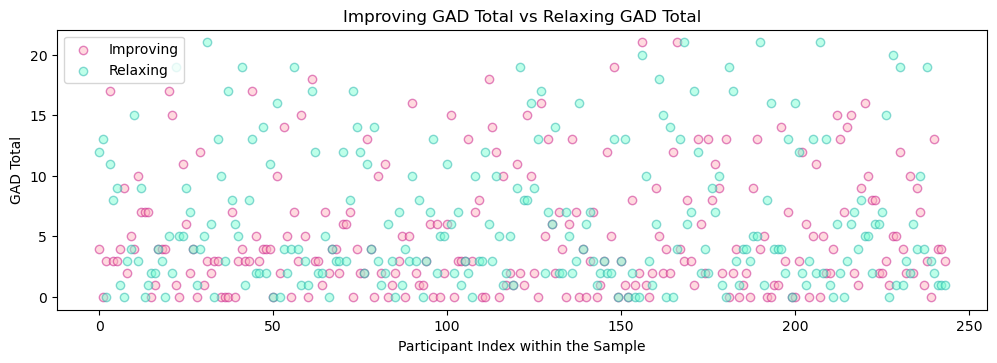

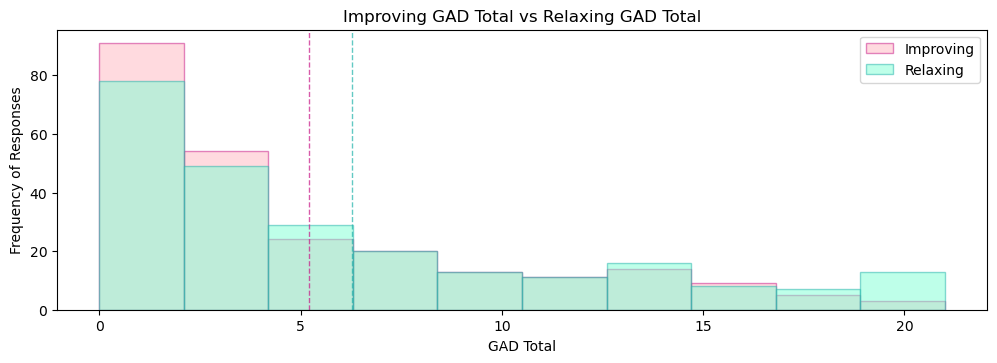

In [44]:
#testing "relaxing" and "improving" to see where they stand in the histogram compared to "winning" and "having fun" graphs
ttestdata(improve_pop, relax_pop, "Improving", "Relaxing", improve_color, relax_color, improve_edgec, relax_edgec, "ImprovRelax")

The relationship between Winning and Relaxing as gaming motivation was found to be not significant, t(2268) = -0.156, p = 0.8759.


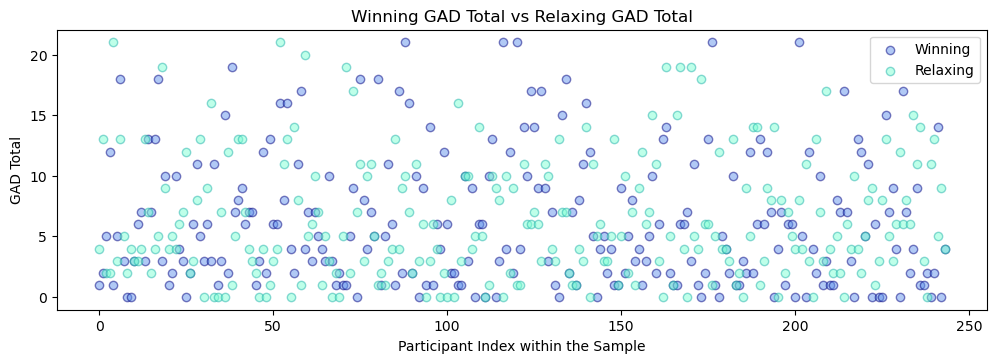

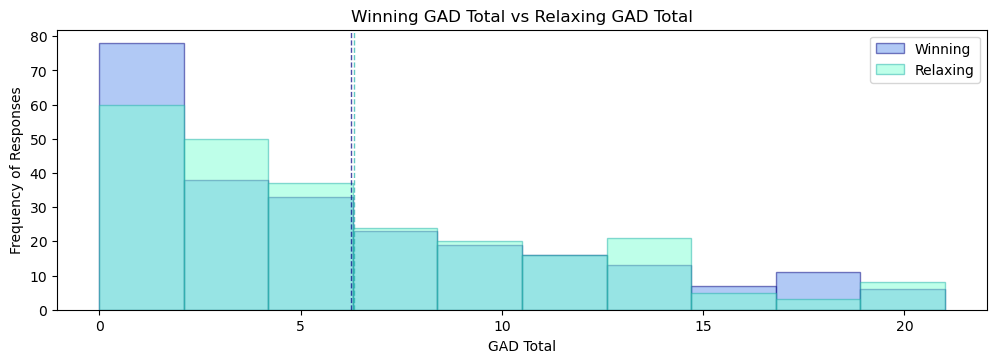

In [45]:
#testing "relaxing" and "improving" to see where they stand in the histogram compared to "winning" and "having fun" graphs
ttestdata(win_pop, relax_pop, "Winning", "Relaxing", win_color, relax_color, win_edgec, relax_edgec, "WinRelax")

#### Independent t-tests explanation/analysis: 
- For the first two graphs, "Having Fun" had significantly lower GAD totals in comparison to those that listed their gaming motivation as "Winning". There were slight variations due to random sampling, but generally the *t*-statistic was less than -1 and the *p*-value was less than 0.05, (*t*(6187) = -2.596, *p* = 0.0097). Therefore, we reject the null hypothesis.
- I had a few sub-questions as well and ran a few more tests comparing winning and relaxing against the other categories. I wanted to see if there was a spectrum of sorts between the categories associated with GAD scores. The last two graphs are part of one of the tests I took for this question- these graphs add "Improving" and "Relaxing" to the whole picture. Most tests aligned with my hypothesis, such as "Having Fun" being associated with lower GAD scores such as when being compared to "Winning" (mentioned earlier) and "Improving" (*t*(8503) = -2.451, *p* = 0.0146). "Winning" also seemed to be associated with higher GAD scores when comparing it to "Having Fun" (as mentioned earlier) and "Improving" (*t*(5722) = 2.112, *p* = 0.0352). However, I found two significant tests concerning relaxation that I found interesting. Depending on the random sample chosen (the tests had been run multiple times) the gaming motivation "Relaxing" would significantly be associated with higher GAD scores when compared to "Improving" (*t*(4584) = -2.44, *p* = 0.0151) and "Having Fun" (*t*(5049) = -4.435, *p* = 0.00). Lastly, although the test between "Relaxing" and "Winning" had been not significant (and therefore not shown), I thought it was worth mentioning that even with the difference in original population sizes between the two categories ("Winning = 1704, "Relaxing" = 566), "Relaxing" had consistently shown a higher number of the highest GAD total. I had originally believed that "Relaxing" would be the lowest on the spectrum with the lowest GAD scores.

***the statistics used within this analysis applied to the time of testing and may not be the same when the code is run again

---

# Kaitlyn

## Questions: 
- Does the preferred playstyled of a game have an effect on anxiety, satisfaction with life, and social phobia?
- Does amount of hours played per week have an effect on anxiety, satisfaction with life, and social phobia?

In [46]:
# file path
full_data_csv = Path('../data_cleanup/Gaming.csv')

# read file
full_data_df = pd.read_csv(full_data_csv)

# preview dataframe
full_data_df.head()

,Unnamed: 0,Entry,Gender,Age,Residence,Birthplace,Work,Degree,Game,Hours per Week,...,SPIN9,SPIN10,SPIN11,SPIN12,SPIN13,SPIN14,SPIN15,SPIN16,SPIN17,SPIN Total
0,0,1,Male,25,USA,USA,Unemployed / between jobs,Bachelor (or equivalent),Skyrim,15,...,0,0,0,0,0,1,0,1,0,5
1,1,2,Male,41,USA,USA,Unemployed / between jobs,Bachelor (or equivalent),Other,8,...,4,0,3,0,1,3,3,1,2,33
2,2,3,Female,32,DEU,DEU,Employed,Bachelor (or equivalent),Other,0,...,0,1,1,3,0,2,4,4,2,31
3,3,4,Male,28,USA,USA,Employed,Bachelor (or equivalent),Other,20,...,0,0,1,3,0,0,1,0,0,11
4,4,5,Male,19,KOR,USA,Employed,High school diploma (or equivalent),Other,20,...,2,0,1,0,0,0,0,3,0,13


### Part 1: Preferred Playstyle Influence on Anxiety, Satisfaction with Life, and Social Phobia

---

##### Null Hypothesis: Preferred playstyle does not have an effect on levels of anxiety, satisfaction with life, or social phobia for an individual who plays games.
##### Alternate Hypothesis: Preferred playstyle has an effect on levels of anxiety, satisfaction with life, or social phobia for an individual who plays games.

In [47]:
# drop columns that are not of interest
playstyle_df = full_data_df.drop(columns = [
    'Unnamed: 0', 'Game', 'Gender', 'Age', 'Residence', 
    'Birthplace', 'Work', 'Degree', 'Gaming Motivation', 
    'GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6', 'GAD7',
    'SWL1','SWL2', 'SWL3', 'SWL4', 'SWL5',
    'SPIN1', 'SPIN2', 'SPIN3', 'SPIN4', 'SPIN5', 'SPIN6', 
    'SPIN7', 'SPIN8', 'SPIN9', 'SPIN10','SPIN11', 'SPIN12', 
    'SPIN13', 'SPIN14', 'SPIN15', 'SPIN16', 'SPIN17'
    ])

# display dataframe
playstyle_df.head()

,Entry,Hours per Week,Playstyle,GAD Total,SWL Total,SPIN Total
0,1,15,Singleplayer,1,23,5
1,2,8,Multiplayer - online - with strangers,8,16,33
2,3,0,Singleplayer,8,17,31
3,4,20,Multiplayer - online - with online acquaintanc...,0,17,11
4,5,20,Multiplayer - online - with strangers,14,14,13


In [48]:
# categorize as only 'singleplayer' or 'multiplayer'
def categorize_playstyle(style: str) -> str:
    style = style.lower()
    if ('multiplayer' in style) and ('singleplayer' in style):
        return None
    elif 'multiplayer' in style:
        return 'multiplayer'
    elif 'singleplayer' in style:
        return "singleplayer"
    else:
        return None

playstyle_df['xPlaystyle'] = playstyle_df.apply(lambda row: categorize_playstyle(row['Playstyle']), axis=1)

# drop rows that did not contain singleplayer or multiplayer
playstyle_df.dropna(subset=['xPlaystyle'], inplace=True)

# display dataframe
playstyle_df.head(20)

,Entry,Hours per Week,Playstyle,GAD Total,SWL Total,SPIN Total,xPlaystyle
0,1,15,Singleplayer,1,23,5,singleplayer
1,2,8,Multiplayer - online - with strangers,8,16,33,multiplayer
2,3,0,Singleplayer,8,17,31,singleplayer
3,4,20,Multiplayer - online - with online acquaintanc...,0,17,11,multiplayer
4,5,20,Multiplayer - online - with strangers,14,14,13,multiplayer
5,6,4,Multiplayer - online - with real life friends,1,17,13,multiplayer
6,7,30,Multiplayer - online - with online acquaintanc...,0,16,26,multiplayer
7,9,2,Multiplayer - online - with strangers,12,12,55,multiplayer
8,10,25,Multiplayer - online - with online acquaintanc...,10,13,26,multiplayer
9,11,14,Singleplayer,19,27,6,singleplayer


In [49]:
# get length of updated dataframe
len(playstyle_df)

11003

In [50]:
# make new dataframe with averages of each score by playstyle
cols = ['xPlaystyle', 'GAD Total', 'SWL Total', 'SPIN Total']
playstyle_mean_df = playstyle_df[cols].groupby(['xPlaystyle']).mean()
playstyle_mean_df = playstyle_mean_df.rename(columns={
    'GAD Total': 'GAD Avg',
    'SWL Total': 'SWL Avg',
    'SPIN Total': 'SPIN Avg'
}).reset_index()

# display dataframe
playstyle_mean_df

,xPlaystyle,GAD Avg,SWL Avg,SPIN Avg
0,multiplayer,5.130204,19.904858,19.441611
1,singleplayer,5.835385,18.583077,22.270769


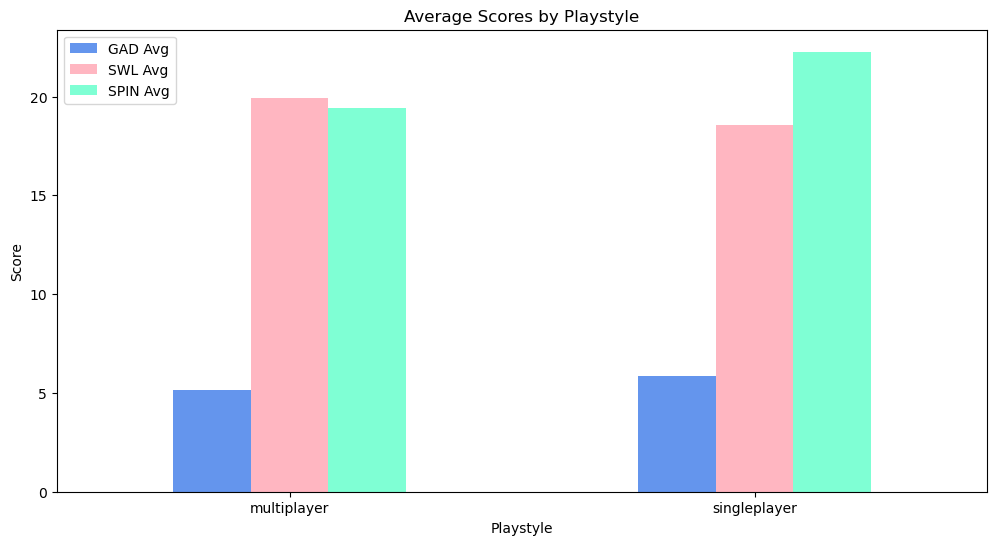

In [51]:
# create bar graph summarizing avg scores by playstyle
cols_playstyle_avg = ['GAD Avg', 'SWL Avg', 'SPIN Avg']
color = ['cornflowerblue', 'lightpink', 'aquamarine']

playstyle_mean_df.plot(
    x = 'xPlaystyle',
    y = ['GAD Avg', 'SWL Avg', 'SPIN Avg'], 
    kind = 'bar', 
    figsize = (12,6), 
    color = color,
    xlabel ='Playstyle', 
    ylabel ='Score', 
    title = 'Average Scores by Playstyle', 
    rot = 0
);

# save figure
plt.savefig('../images/playstyle_bar_all')

# display figure
plt.show()

In [52]:
# find statistical significances for scores between each playstyle group

# statistical significance of gad scores between playstyles
singleplayer_gad = playstyle_df[playstyle_df['xPlaystyle'] == 'singleplayer']
multiplayer_gad = playstyle_df[playstyle_df['xPlaystyle'] == 'multiplayer']
q1_result_gad = ttest_ind(singleplayer_gad['GAD Total'], multiplayer_gad['GAD Total'])

if q1_result_gad.statistic >= 2 or q1_result_gad.statistic <= -2 and q1_result_gad.pvalue < 0.05:
    print(f'Statistical significance of GAD scores between playstyles: \
    \nt-stat: {q1_result_gad.statistic} \
    \np-value: {q1_result_gad.pvalue} \
    \ndegrees of freedom: {q1_result_gad.df} \
    \nThe data is statistically significant. We may reject the null hypothesis.'
)
else:
    print(f'Statistical significance of GAD scores between playstyles: \
    \nt-stat: {q1_result_gad.statistic} \
    \np-value: {q1_result_gad.pvalue} \
    \ndegrees of freedom: {q1_result_gad.df} \
    \nThe data is not statistically significant. We may not reject the null hypothesis.'
) 

print('')

# statistical significance of swl scores between playstyles
singleplayer_swl = playstyle_df[playstyle_df['xPlaystyle'] == 'singleplayer']
multiplayer_swl = playstyle_df[playstyle_df['xPlaystyle'] == 'multiplayer']
q1_result_swl = ttest_ind(singleplayer_swl['SWL Total'], multiplayer_swl['SWL Total'])

if q1_result_swl.statistic >= 2 or q1_result_swl.statistic <= -2 and q1_result_swl.pvalue < 0.05:
    print(
    f'Statistical significance of SWL scores between playstyles: \
    \nt-stat: {q1_result_swl.statistic} \
    \np-value: {q1_result_swl.pvalue} \
    \ndegrees of freedom: {q1_result_swl.df} \
    \nThe data is statistically significant. We may reject the null hypothesis.'
)
else:
    print(
    f'Statistical significance of SWL scores between playstyles: \
    \nt-stat: {q1_result_swl.statistic} \
    \np-value: {q1_result_swl.pvalue} \
    \ndegrees of freedom: {q1_result_swl.df} \
    \nThe data is not statistically significant. We may not reject the null hypothesis.'
) 

print('')

# statistical significance of spin scores between playstyles
singleplayer_spin = playstyle_df[playstyle_df['xPlaystyle'] == 'singleplayer']
multiplayer_spin = playstyle_df[playstyle_df['xPlaystyle'] == 'multiplayer']
q1_result_spin = ttest_ind(singleplayer_spin['SPIN Total'], multiplayer_spin['SPIN Total'])

if q1_result_spin.statistic >= 2 or q1_result_spin.statistic <= -2 and q1_result_spin.pvalue < 0.05:
    print(f'Statistical significance of SPIN scores between playstyles: \
    \nt-stat: {q1_result_spin.statistic} \
    \np-value: {q1_result_spin.pvalue} \
    \ndegrees of freedom: {q1_result_swl.df} \
    \nThe data is statistically significant. We may reject the null hypothesis.'
)
else:
    print(f'Statistical significance of SPIN scores between playstyles: \
    \nt-stat: {q1_result_spin.statistic} \
    \np-value: {q1_result_spin.pvalue} \
    \ndegrees of freedom: {q1_result_spin.df} \
    \nThe data is not statistically significant. We may not reject the null hypothesis.'
)

Statistical significance of GAD scores between playstyles:     
t-stat: 3.722876942234274     
p-value: 0.00019794829345995884     
degrees of freedom: 11001.0     
The data is statistically significant. We may reject the null hypothesis.

Statistical significance of SWL scores between playstyles:     
t-stat: -4.539017878181439     
p-value: 5.71164488290868e-06     
degrees of freedom: 11001.0     
The data is statistically significant. We may reject the null hypothesis.

Statistical significance of SPIN scores between playstyles:     
t-stat: 5.2192145532734475     
p-value: 1.829569817520145e-07     
degrees of freedom: 11001.0     
The data is statistically significant. We may reject the null hypothesis.


---
### Question 1 Analysis:
##### Main observations:
##### Higher avg GAD score in singleplayer group 
- t = 3.72, p = 0.0002
##### Lower avg SWL score in singleplayer group
- t = -4.54, p = 5.71e-6
##### Higher avg SPIN score in singleplayer group
- t = 5.22, p = 1.83e-7
##### Overall, we reject the null hypothesis and accept the alternate hypothesis: Preferred playstyle does have an effect on levels of anxiety, satisfaction with life, or social phobia for an individual who plays games.
- Exploratory commentary: Players who primarily play singleplayer games appear on average to be more negatively impacted by their mental health and are associated with higher levels of anxiety, lower levels of satisfaction with life, and higher levels of social phobia when compared to players who primarily play multiplayer games. A reasonable explanation for these observations could be that players with higher social phobia may gravitate towards singleplayer games in order to avoid social interaction that were to occur when playing multiplayer games. It is also possible for social phobia to serve as contributing factor to levels of anxiety, which may also additionally explain why anxiety levels are higher in players who play singleplayer than players who play multiplayer. In addition, due to increased levels of both anxiety and social phobia, this may also explain a decrease in satisfaction with life, as higher anxiety and social phobia can be seen as a source of discomfort that could possibly contribute to a lower SWL score. 
---


### Part 2: Hours Played Influence on Anxiety, Satisfaction with Life, and Social Phobia

##### Null Hypothesis: Hours played per week does not have an effect on levels of anxiety, satisfaction with life, or social phobia for an individual who plays games.
##### Alternate Hypothesis: Hours played per week has an effect on levels of anxiety, satisfaction with life, or social phobia for an individual who plays games.

In [53]:
# drop columns that are not of interest
hours_df = full_data_df.drop(columns = [
    'Unnamed: 0', 'Game', 'Gender', 'Age', 'Residence', 
    'Birthplace', 'Work', 'Degree', 'Gaming Motivation', 'Playstyle',
    'GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6', 'GAD7',
    'SWL1','SWL2', 'SWL3', 'SWL4', 'SWL5',
    'SPIN1', 'SPIN2', 'SPIN3', 'SPIN4', 'SPIN5', 'SPIN6', 
    'SPIN7', 'SPIN8', 'SPIN9', 'SPIN10','SPIN11', 'SPIN12', 
    'SPIN13', 'SPIN14', 'SPIN15', 'SPIN16', 'SPIN17'
    ])

# display dataframe
hours_df.head()

,Entry,Hours per Week,GAD Total,SWL Total,SPIN Total
0,1,15,1,23,5
1,2,8,8,16,33
2,3,0,8,17,31
3,4,20,0,17,11
4,5,20,14,14,13


In [54]:
# find minimum hours per week played
hours_df['Hours per Week'].min()

0

In [55]:
# drop rows with 0 hours
zero_hours = hours_df[hours_df['Hours per Week'] == 0].index
hours_df.drop(zero_hours, inplace=True)

# display dataframe
hours_df.head()

,Entry,Hours per Week,GAD Total,SWL Total,SPIN Total
0,1,15,1,23,5
1,2,8,8,16,33
3,4,20,0,17,11
4,5,20,14,14,13
5,6,4,1,17,13


In [56]:
# get length of updated dataframe
len(hours_df)

11128

In [57]:
# find new minimum hours per week played
hours_df['Hours per Week'].min()

1

In [58]:
# find maximum hours per week played
hours_df['Hours per Week'].max()

140

In [59]:
# make copy of hours_df
hours_halved_df = hours_df.copy()

# create bins
bins = [1, 70, 140]

# create names for bins
hours_halved = ['70 or Less', 'More than 70']

# slice data and place into bins
hours_halved_df['Hours per Week Range'] = pd.cut(hours_halved_df['Hours per Week'], 
                                          bins, labels=hours_halved, 
                                          include_lowest=True)

# display dataframe
hours_halved_df.head()

,Entry,Hours per Week,GAD Total,SWL Total,SPIN Total,Hours per Week Range
0,1,15,1,23,5,70 or Less
1,2,8,8,16,33,70 or Less
3,4,20,0,17,11,70 or Less
4,5,20,14,14,13,70 or Less
5,6,4,1,17,13,70 or Less


In [60]:
# make new dataframe with averages of each score by hours played per week
cols = ['Hours per Week Range', 'GAD Total', 'SWL Total', 'SPIN Total']
hours_halved_mean_df = hours_halved_df[cols].groupby(['Hours per Week Range'], observed=False).mean()
hours_halved_mean_df = hours_halved_mean_df.rename(columns={
    'GAD Total': 'GAD Avg',
    'SWL Total': 'SWL Avg',
    'SPIN Total': 'SPIN Avg'
}).reset_index()

# display dataframe
hours_halved_mean_df.head()

,Hours per Week Range,GAD Avg,SWL Avg,SPIN Avg
0,70 or Less,5.142172,19.863801,19.538281
1,More than 70,8.038462,15.243590,25.474359


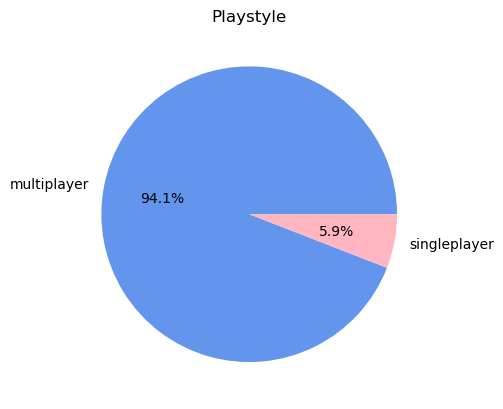

In [61]:
# create pie chart to visualize player distribution

# assign variables
playstyle_counts = playstyle_df['xPlaystyle'].value_counts()
colors = ['cornflowerblue', 'lightpink']
# create pie plot
plt.title('Playstyle')
plt.pie(
        playstyle_counts, 
        labels= playstyle_counts.index, 
        autopct= '%1.1f%%', 
        colors=colors,
        startangle= 0
)

# save figure
plt.savefig('../images/playstyle_pie')

# diplay figure
plt.show()

Statistical significance of GAD scores between hours played:     
t-stat: -5.440184563237311     
p-value: 5.435262531747837e-08     
degrees of freedom: 11126.0     
The data is statistically significant. We may reject the null hypothesis.


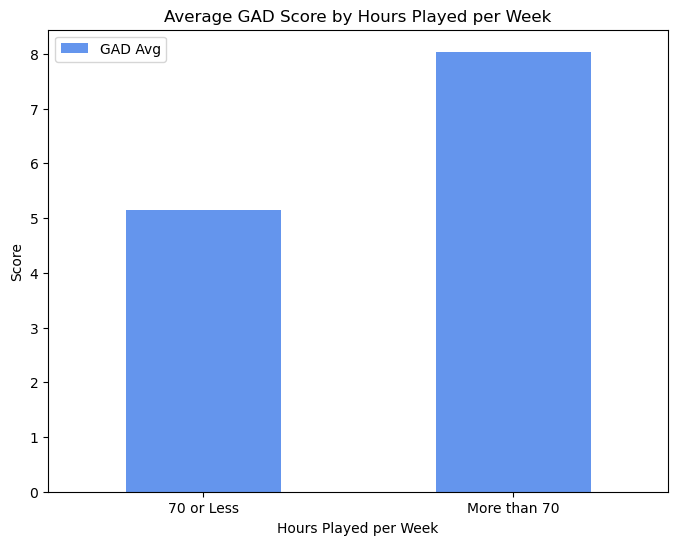

In [62]:
# create bar graph displaying avg GAD scores by hours played per week
cols_hours_gad_avg = ['GAD Avg']

hours_halved_mean_df.plot(
    x='Hours per Week Range',
    y=['GAD Avg'], 
    kind='bar', 
    figsize=(8,6), 
    color='cornflowerblue',
    xlabel='Hours Played per Week', 
    ylabel='Score', 
    title='Average GAD Score by Hours Played per Week', 
    rot=0
);

# statistical significance of GAD scores between lower and higher hours played
gad_low_hr = hours_halved_df[(hours_halved_df['Hours per Week Range'] == "70 or Less")]
gad_high_hr = hours_halved_df[(hours_halved_df['Hours per Week Range'] == "More than 70")]
q2_result_gad = ttest_ind(gad_low_hr['GAD Total'], gad_high_hr['GAD Total'])

if q2_result_gad.statistic >= 2 or q2_result_gad.statistic <= -2 and q2_result_gad.pvalue < 0.05:
    print(
    f'Statistical significance of GAD scores between hours played: \
    \nt-stat: {q2_result_gad.statistic} \
    \np-value: {q2_result_gad.pvalue} \
    \ndegrees of freedom: {q2_result_gad.df} \
    \nThe data is statistically significant. We may reject the null hypothesis.'
)
else:
    print(
    f'Statistical significance of GAD scores between hours played: \
    \nt-stat: {q2_result_gad.statistic} \
    \np-value: {q2_result_gad.pvalue} \
    \ndegrees of freedom: {q2_result_gad.df} \
    \nThe data is not statistically significant. We may not reject the null hypothesis.'
) 

# save figure
plt.savefig('../images/hours_halved_gad_bar')

# display figure
plt.show()

Statistical significance of SWL scores between hours played:     
t-stat: 5.653977577806831     
p-value: 1.6063865250603278e-08     
degrees of freedom: 11126.0     
The data is statistically significant. We may reject the null hypothesis.


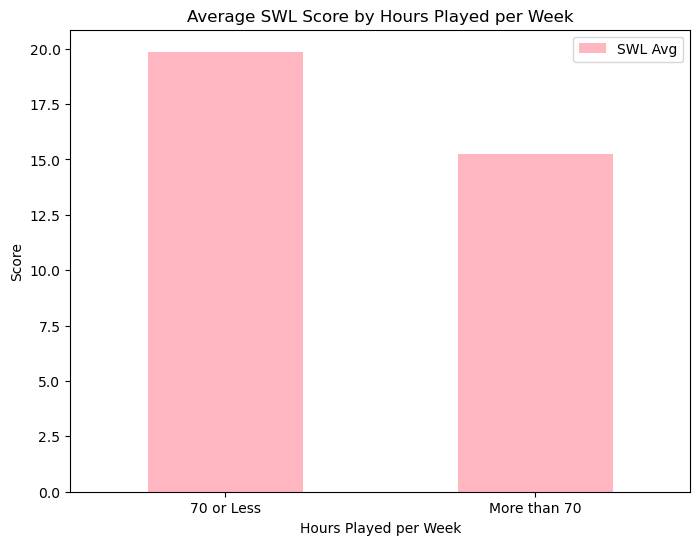

In [63]:
# create bar graph displaying avg SWL scores by hours played per week
cols_hours_swl_avg = ['SWL Avg']

hours_halved_mean_df.plot(
    x = 'Hours per Week Range',
    y = ['SWL Avg'], 
    kind = 'bar', 
    figsize = (8,6), 
    color = 'lightpink',
    xlabel = 'Hours Played per Week', 
    ylabel = 'Score', 
    title = 'Average SWL Score by Hours Played per Week', 
    rot=0
);

# find statistical significance of SWL scores between lower and higher hours played
swl_low_hr = hours_halved_df[(hours_halved_df['Hours per Week Range'] == "70 or Less")]
swl_high_hr = hours_halved_df[(hours_halved_df['Hours per Week Range'] == "More than 70")]
q2_result_swl = ttest_ind(gad_low_hr['SWL Total'], gad_high_hr['SWL Total'])

if q2_result_swl.statistic >= 2 or q2_result_swl.statistic <= -2 and q2_result_swl.pvalue < 0.05:
    print(
    f'Statistical significance of SWL scores between hours played: \
    \nt-stat: {q2_result_swl.statistic} \
    \np-value: {q2_result_swl.pvalue} \
    \ndegrees of freedom: {q2_result_swl.df} \
    \nThe data is statistically significant. We may reject the null hypothesis.'
)
else:
    print(
    f'Statistical significance of SWL scores between hours played: \
    \nt-stat: {q2_result_swl.statistic} \
    \np-value: {q2_result_swl.pvalue} \
    \ndegrees of freedom: {q2_result_swl.df} \
    \nThe data is not statistically significant. We may not reject the null hypothesis.'
) 


# save figure
plt.savefig('../images/hours_halved_swl_bar')

# display figure
plt.show()

Statistical significance of SPIN scores between hours played:     
t-stat: -3.895590838898919     
p-value: 9.853311266971915e-05     
degrees of freedom: 11126.0     
The data is statistically significant. We may reject the null hypothesis.


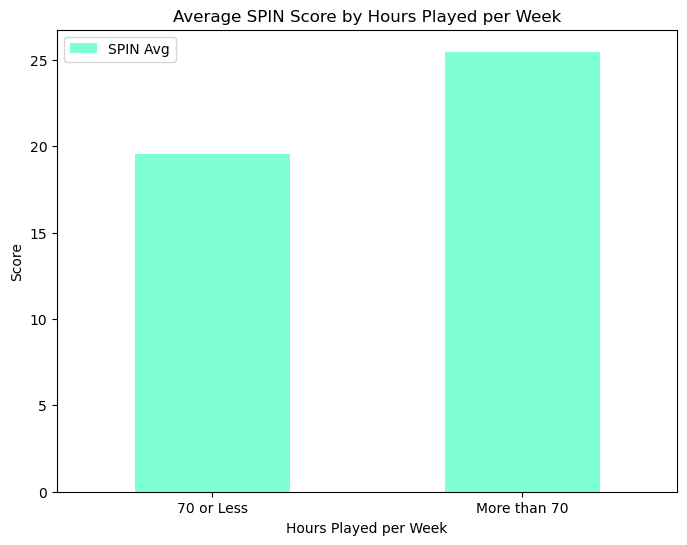

In [64]:
# create bar graph displaying avg SPIN scores by hours played per week
cols_hours_spin_avg = ['SPIN Avg']

hours_halved_mean_df.plot(
    x = 'Hours per Week Range',
    y = ['SPIN Avg'], 
    kind = 'bar', 
    figsize = (8,6), 
    color = 'aquamarine',
    xlabel = 'Hours Played per Week', 
    ylabel = 'Score', 
    title = 'Average SPIN Score by Hours Played per Week', 
    rot=0
);

# find statistical significance of SPIN scores between lower and higher hours played
spin_low_hr = hours_halved_df[(hours_halved_df['Hours per Week Range'] == "70 or Less")]
spin_high_hr = hours_halved_df[(hours_halved_df['Hours per Week Range'] == "More than 70")]
q2_result_spin = ttest_ind(gad_low_hr['SPIN Total'], gad_high_hr['SPIN Total'])

if q2_result_spin.statistic >= 2 or q2_result_spin.statistic <= -2 and q2_result_spin.pvalue < 0.05:
    print(
    f'Statistical significance of SPIN scores between hours played: \
    \nt-stat: {q2_result_spin.statistic} \
    \np-value: {q2_result_spin.pvalue} \
    \ndegrees of freedom: {q2_result_spin.df} \
    \nThe data is statistically significant. We may reject the null hypothesis.'
)
else:
    print(
    f'Statistical significance of SPIN scores between hours played: \
    \nt-stat: {q2_result_spin.statistic} \
    \np-value: {q2_result_spin.pvalue} \
    \ndegrees of freedom: {q2_result_spin.df} \
    \nThe data is not statistically significant. We may not reject the null hypothesis.'
) 
    
# save figure
plt.savefig('../images/hours_halved_spin_bar')

# display figure
plt.show()

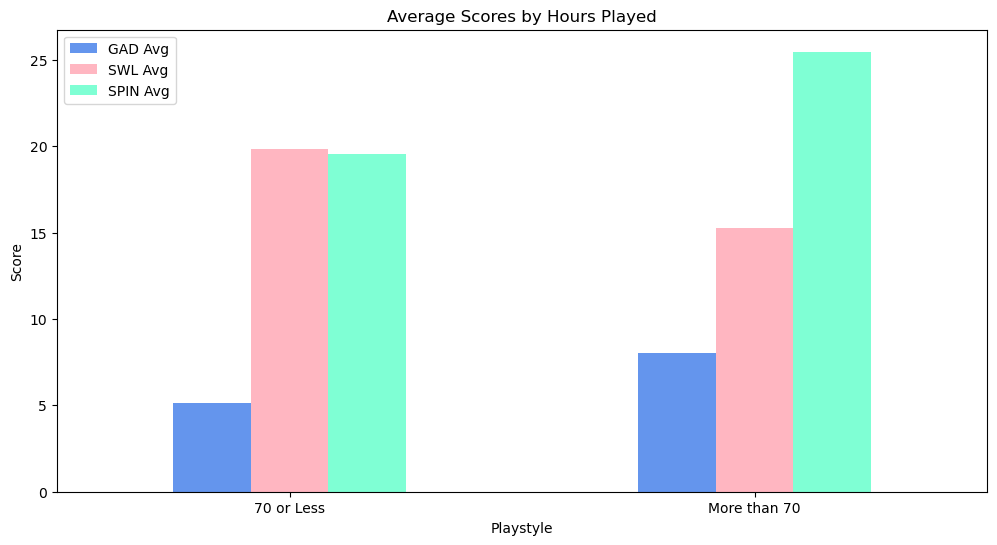

In [65]:
# create bar graph summarizing avg scores by hours played
cols_hours_avg = ['GAD Avg', 'SWL Avg', 'SPIN Avg']
color=['cornflowerblue', 'lightpink', 'aquamarine']

hours_halved_mean_df.plot(
    x = 'Hours per Week Range',
    y = ['GAD Avg', 'SWL Avg', 'SPIN Avg'], 
    kind = 'bar', 
    figsize = (12,6), 
    color = color,
    xlabel = 'Playstyle', 
    ylabel = 'Score', 
    title = 'Average Scores by Hours Played', 
    rot = 0
);

# save figure
plt.savefig('../images/hours_halved_bar_all')

# display figure
plt.show()

#### Additional Analysis: Separating hours played into more bins to better visualize trends in scores.

In [66]:
# create bins for hours played
bins = [1, 20, 40, 60, 80, 140]

# create names for bins
hour_ranges = ['1 to 20', '21 to 40', '41 to 60', '61 to 80', '80+']

# slice data and place into bins
hours_df['Hours per Week Range'] = pd.cut(hours_df['Hours per Week'], 
                                          bins, labels=hour_ranges, 
                                          include_lowest=True)

# display dataframe
hours_df.head()

,Entry,Hours per Week,GAD Total,SWL Total,SPIN Total,Hours per Week Range
0,1,15,1,23,5,1 to 20
1,2,8,8,16,33,1 to 20
3,4,20,0,17,11,1 to 20
4,5,20,14,14,13,1 to 20
5,6,4,1,17,13,1 to 20


In [67]:
# make new dataframe with averages of each score by hours played per week
cols_2 = ['Hours per Week Range', 'GAD Total', 'SWL Total', 'SPIN Total']
hours_mean_df = hours_df[cols_2].groupby(['Hours per Week Range'], observed=False).mean()
hours_mean_df = hours_mean_df.rename(columns={
    'GAD Total': 'GAD Avg',
    'SWL Total': 'SWL Avg',
    'SPIN Total': 'SPIN Avg'
}).reset_index()

# display dataframe
hours_mean_df.head()

,Hours per Week Range,GAD Avg,SWL Avg,SPIN Avg
0,1 to 20,4.920160,20.422726,18.695894
1,21 to 40,5.364785,19.164903,20.644033
2,41 to 60,6.413043,17.465580,22.952899
3,61 to 80,6.859504,16.429752,23.595041
4,80+,8.128205,15.666667,25.538462


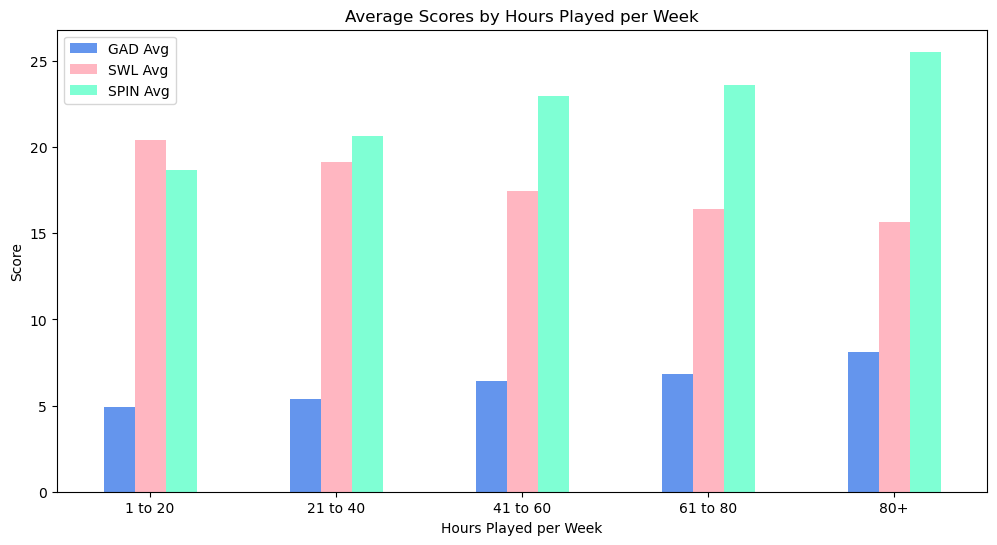

In [68]:
# create bar graph displaying avg scores by hours played per week
cols_2_avg = ['GAD Avg', 'SWL Avg', 'SPIN Avg']
color = ['cornflowerblue', 'lightpink', 'aquamarine']

hours_mean_df.plot(
    x = 'Hours per Week Range',
    y = ['GAD Avg', 'SWL Avg', 'SPIN Avg'], 
    kind ='bar', 
    figsize = (12,6), 
    color = color,
    xlabel = 'Hours Played per Week', 
    ylabel = 'Score', 
    title = 'Average Scores by Hours Played per Week', 
    rot = 0
);

# save figure
plt.savefig('../images/hours_binned_bar')

# display figure
plt.show()

---
### Question 2 Analysis:
##### Main observations:
##### Higher avg GAD score in >70 hours group
- t = -5.44, p = 5.44e-8
##### Lower avg SWL score in >70 hours group
- t = 5.65, p = 1.61e-8
##### Higher avg SPIN score in >70 hours group
- t = -3.90, p = 9.85e-5
##### Overall, we reject the null hypothesis and accept the alternate hypothesis: Hours played per week does have an effect on levels of anxiety, satisfaction with life, or social phobia for an individual who plays games.
- Exploratory commentary: Players who primarily play singleplayer games appear on average to be more negatively impacted by their mental health and are associated with higher levels of anxiety, lower levels of satisfaction with life, and higher levels of social phobia when compared to players who primarily play multiplayer games. A reasonable explanation for these observations could be that players with higher social phobia may gravitate towards singleplayer games in order to avoid social interaction that were to occur when playing multiplayer games. It is also possible for social phobia to serve as contributing factor to levels of anxiety, which may also additionally explain why anxiety levels are higher in players who play singleplayer than players who play multiplayer. In addition, due to increased levels of both anxiety and social phobia, this may also explain a decrease in satisfaction with life, as higher anxiety and social phobia can be seen as a source of discomfort that could possibly contribute to a lower SWL score.

---

#### Combined exploratory commentary (playstyle + hours played)
- When taking a look at two aspects of gaming lifestyle, preferred playstyle and number of hours played, there appears to be a common denominator. Decisions being made about the type of playstyle an individual engages in or how many hours they want to play all contribute to the amount of socialization they are exposing themselves to. For example, a person who plays multiplayer games at a rate of only about 10 hours a week has the ability to interact with others in a digital setting, while also having a healthy amount of time to be away from playing videogames and spending time outside of their homes. On the other hand, a person who opts for only singleplayer games that plays over 10 hours a day (70 hours/week) has almost little to no time interacting or socializing with others, whether it be digitally/online or in real life. These gaming lifestyle choices, as a result, highly weigh into an individual’s overall lifestyle and ultimately into their mental health. It was observed overall that the more exposure and/or opportunities an individual who plays games has to socialize with others, the less their mental health (in this case anxiety, social phobia, and satisfaction with life) suffers. The less exposure and/or opportunities they have to socialize, the more they appear to be negatively impacted by their mental health. 
